In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/HandGesture_SPS/Dataset-final4th.zip'

Archive:  /content/drive/My Drive/HandGesture_SPS/Dataset-final4th.zip
   creating: Dataset-final/
   creating: Dataset-final/Test/
   creating: Dataset-final/Test/Paper/
  inflating: Dataset-final/Test/Paper/20140716_230806.jpg  
  inflating: Dataset-final/Test/Paper/20140716_231218.jpg  
  inflating: Dataset-final/Test/Paper/20140716_231412.jpg  
  inflating: Dataset-final/Test/Paper/2017-04-04 18.55.51.jpg  
  inflating: Dataset-final/Test/Paper/20170705_121823.jpg  
  inflating: Dataset-final/Test/Paper/20170705_121841.jpg  
  inflating: Dataset-final/Test/Paper/20170705_121911 - Copy.jpg  
  inflating: Dataset-final/Test/Paper/20170705_121911.jpg  
  inflating: Dataset-final/Test/Paper/20170705_122041 - Copy.jpg  
  inflating: Dataset-final/Test/Paper/20170705_122041.jpg  
  inflating: Dataset-final/Test/Paper/20170705_122251 - Copy.jpg  
  inflating: Dataset-final/Test/Paper/20170705_122251.jpg  
  inflating: Dataset-final/Test/Paper/20170802_161644.jpg  
  inflating: Dataset-fin

In [ ]:
base_model = InceptionV3(input_shape = (150,150,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
	layer.trainable=False
	
base_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________

In [ ]:
last_layer = base_model.get_layer('mixed7')
last_output = last_layer.output
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 7, 7, 768)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(4, activation='softmax')(x)           

handModel = Model(base_model.input, x)

handModel.compile (optimizer = 'rmsprop', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [ ]:
train = '/content/Dataset-final/Train'
validation = '/content/Dataset-final/Validation'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory (train, batch_size=32, class_mode='categorical', target_size=(150,150))
validation_generator =  validation_datagen.flow_from_directory (validation, batch_size=32, class_mode='categorical', target_size=(150,150))

Found 1791 images belonging to 4 classes.
Found 654 images belonging to 4 classes.


In [ ]:
history = handModel.fit(
    train_generator,
    steps_per_epoch=56,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=21)

handModel.save('/content/Dataset-final4th-Inception(150x150 rps).h5')

Epoch 1/100
56/56 [==============================] - 182s 3s/step - loss: 1.4214 - accuracy: 0.3210 - val_loss: 1.3099 - val_accuracy: 0.4297
Epoch 2/100
56/56 [==============================] - 183s 3s/step - loss: 1.3714 - accuracy: 0.3696 - val_loss: 1.3191 - val_accuracy: 0.4220
Epoch 3/100
56/56 [==============================] - 184s 3s/step - loss: 1.3135 - accuracy: 0.4271 - val_loss: 1.2795 - val_accuracy: 0.4526
Epoch 4/100
56/56 [==============================] - 183s 3s/step - loss: 1.0999 - accuracy: 0.6365 - val_loss: 1.0515 - val_accuracy: 0.6881
Epoch 5/100
56/56 [==============================] - 183s 3s/step - loss: 1.0370 - accuracy: 0.7052 - val_loss: 1.0847 - val_accuracy: 0.6560
Epoch 6/100
56/56 [==============================] - 184s 3s/step - loss: 0.9950 - accuracy: 0.7471 - val_loss: 1.0854 - val_accuracy: 0.6590
Epoch 7/100
56/56 [==============================] - 183s 3s/step - loss: 1.0033 - accuracy: 0.7359 - val_loss: 0.9672 - val_accuracy: 0.7768
Epoch 

In [ ]:
handModel.save('/content/Dataset-finalInception(150x150 rps).h5')

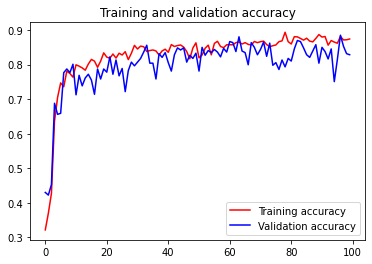

<Figure size 432x288 with 0 Axes>

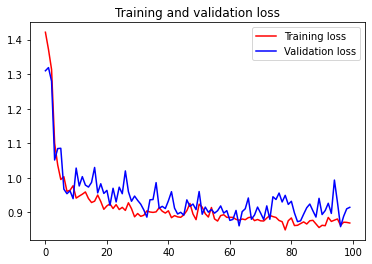

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
test = '/content/Dataset-final/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=64, class_mode='categorical', target_size=(150,150))

Found 237 images belonging to 4 classes.


In [ ]:
handModel.evaluate(test_generator, steps=4)

4/4 [==============================] - 22s 5s/step - loss: 0.7737 - accuracy: 0.9705


[0.7737197279930115, 0.9704641103744507]

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = odel.predict(images, batch_size=10)
  print(fn)
  print(classes)